In [419]:
#import dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

## Merging stocks Data -for each vaccine into combined vaccine stock

In [420]:


# Dictionary containing tickers and corresponding file paths
csv_files = {
    'PFE': 'C:/Users/Muskan/Documents/Projects/project1_group2/Muskan/Resources/PFE_data.csv',
    'AZN': 'C:/Users/Muskan/Documents/Projects/project1_group2/Muskan/Resources/AZN_data.csv',
    'BNTX': 'C:/Users/Muskan/Documents/Projects/project1_group2/Muskan/Resources/BNTX_data.csv',
    'MRNA': 'C:/Users/Muskan/Documents/Projects/project1_group2/Muskan/Resources/MRNA_data.csv',
    
    'JNJ': 'C:/Users/Muskan/Documents/Projects/project1_group2/Muskan/Resources/JNJ_data.csv',
    'GSK': 'C:/Users/Muskan/Documents/Projects/project1_group2/Muskan/Resources/GSK_data.csv',
    #'NVAX': 'C:/Users/Muskan/Documents/Projects/project1_group2/Muskan/Resources/NVAX_data.csv',
    #'SNY': 'C:/Users/Muskan/Documents/Projects/project1_group2/Muskan/Resources/SNY_data.csv'
}

# Empty list to hold data from each file
combined_data = []

# Loop through each ticker and corresponding file
for ticker, file in csv_files.items():

    # Load the current CSV file
    data = pd.read_csv(file)
    
    # Adjust the column names if necessary (e.g., 'Adj Close' instead of 'Adj_Close')
    data = data[['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
    
    # Append this data to the combined list
    combined_data.append(data)

# Concatenate all the data into a single DataFrame
combined_df = pd.concat(combined_data, ignore_index=True)

# Save the combined data to a new CSV file
combined_df.to_csv('combined_vaccine_stocks.csv', index=False)

# Preview the first few rows of the combined data
combined_df.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,PFE,2020-01-02,37.286530,37.333965,36.888046,37.134724,30.443775,16514072
1,PFE,2020-01-03,36.736244,37.229603,36.688805,36.935486,30.280436,14922848
2,PFE,2020-01-06,36.831120,37.001900,36.717270,36.888046,30.241545,15771951
3,PFE,2020-01-07,37.115749,37.125237,36.698292,36.764706,30.140430,20108107
4,PFE,2020-01-08,36.774193,37.210625,36.764706,37.058823,30.381554,16403507


## Cleaning the Data-

In [421]:
# Check for missing values-

missing_values = combined_df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [422]:
# Check for Duplicates-

duplicates = combined_df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicate rows if any
stock_data_cleaned = combined_df.drop_duplicates()

Number of duplicate rows: 0


In [423]:

# Ensure 'Date' column is in datetime format

stock_data_cleaned['Date'] = pd.to_datetime(stock_data_cleaned['Date'])

# Verify the data types
print(stock_data_cleaned.dtypes)

Ticker               object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [424]:
# Identify outliers using IQR

# Convert relevant columns to numeric, if not already
columns_to_convert = ['Open', 'Close', 'Volume']  # Add all relevant columns
for col in columns_to_convert:
    stock_data_cleaned[col] = pd.to_numeric(stock_data_cleaned[col], errors='coerce')

# Drop rows with NaN values in the columns of interest
stock_data_cleaned = stock_data_cleaned.dropna(subset=columns_to_convert)

# Calculate the quartiles and IQR for the numeric columns
Q1 = stock_data_cleaned[columns_to_convert].quantile(0.25)
Q3 = stock_data_cleaned[columns_to_convert].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers using the IQR method
outliers = stock_data_cleaned[((stock_data_cleaned[columns_to_convert] < (Q1 - 1.5 * IQR)) | (stock_data_cleaned[columns_to_convert] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers:\n", outliers)

# Optionally, remove outliers
stock_data_cleaned_no_outliers = stock_data_cleaned[~((stock_data_cleaned[columns_to_convert] < (Q1 - 1.5 * IQR)) | (stock_data_cleaned[columns_to_convert] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Optional: print or work with the cleaned data
print("Data without outliers:\n", stock_data_cleaned_no_outliers)



Outliers:
      Ticker       Date        Open        High         Low       Close  \
9       PFE 2020-01-15   38.130932   38.776093   38.111954   38.586338   
14      PFE 2020-01-23   38.130932   38.738140   38.074005   38.624287   
15      PFE 2020-01-24   38.842506   38.870968   37.609108   37.779884   
16      PFE 2020-01-27   37.390892   38.358635   37.239090   38.102467   
17      PFE 2020-01-28   37.305504   37.466793   36.005692   36.185959   
...     ...        ...         ...         ...         ...         ...   
4940    JNJ 2023-08-23  165.899994  166.500000  163.470001  164.529999   
4941    JNJ 2023-08-24  164.029999  166.669998  163.860001  165.089996   
5304    GSK 2021-02-03   36.110001   36.669998   35.310001   35.419998   
5687    GSK 2022-08-11   34.980000   35.990002   34.500000   35.730000   
5768    GSK 2022-12-06   34.740002   39.740002   34.240002   37.919998   

       Adj Close     Volume  
9      31.633842   23925800  
14     31.664946   27148510  
15     30.

In [425]:
# Summary of cleaned data
print(stock_data_cleaned.info())

stock_data_cleaned.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036 entries, 0 to 6035
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     6036 non-null   object        
 1   Date       6036 non-null   datetime64[ns]
 2   Open       6036 non-null   float64       
 3   High       6036 non-null   float64       
 4   Low        6036 non-null   float64       
 5   Close      6036 non-null   float64       
 6   Adj Close  6036 non-null   float64       
 7   Volume     6036 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 377.4+ KB
None


,Date,Open,High,Low,Close,Adj Close,Volume
count,6036,6036.000000,6036.000000,6036.000000,6036.000000,6036.000000,6.036000e+03
mean,2021-12-30 11:57:08.230616320,97.908892,99.694232,96.088585,97.942998,93.707074,1.027304e+07
min,2020-01-02 00:00:00,17.990000,18.080000,17.680000,17.780001,17.780001,6.620000e+04
25%,2020-12-30 00:00:00,41.709999,42.070000,41.369999,41.700001,37.158722,3.283450e+06
50%,2021-12-29 12:00:00,65.789997,66.683498,64.895000,65.900002,63.434494,5.711800e+06
75%,2022-12-29 00:00:00,150.512501,153.047497,148.300003,150.582504,145.331993,1.133582e+07
max,2023-12-29 00:00:00,485.500000,497.489990,454.000000,484.470001,484.470001,2.301539e+08
std,NaN,70.644625,72.709418,68.622679,70.786114,70.378738,1.328701e+07


### Calculate Quarterly change of stocks 

In [426]:
#Quarterly change from the opening price at the beginning of a given quarter to the closing price at the end of that quarter.

# Filter all rows (:) and specific columns: 'Ticker', 'Date', 'Open', 'Close'
filtered_df = combined_df.loc[:, ['Ticker', 'Date', 'Open', 'Close','Volume']]


# Convert the 'Date' column to datetime format

filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

filtered_df

,Ticker,Date,Open,Close,Volume
0,PFE,2020-01-02,37.286530,37.134724,16514072
1,PFE,2020-01-03,36.736244,36.935486,14922848
2,PFE,2020-01-06,36.831120,36.888046,15771951
3,PFE,2020-01-07,37.115749,36.764706,20108107
4,PFE,2020-01-08,36.774193,37.058823,16403507
...,...,...,...,...,...
6031,GSK,2023-12-22,36.900002,36.990002,1768300
6032,GSK,2023-12-26,36.880001,37.009998,1325800
6033,GSK,2023-12-27,36.869999,37.099998,1880400
6034,GSK,2023-12-28,37.150002,37.090000,1709900


In [427]:
# Step 2: Group by quarters

quarterly_change_df = filtered_df.groupby([filtered_df['Ticker'],filtered_df['Date'].dt.to_period('Q')])


quarterly_change_df = filtered_df.groupby([filtered_df['Ticker'], filtered_df['Date'].dt.to_period('Q')]).agg(
    first_open=('Open', 'first'),   # First open price in the quarter
    last_close=('Close', 'last'),   # Last close price in the quarter
    total_volume=('Volume', 'sum')  # Sum of volume for quarter
).reset_index()




In [428]:
# Step 4: Calculate the quarterly change (absolute difference or percentage)
quarterly_change_df['change'] = quarterly_change_df['last_close'] - quarterly_change_df['first_open']

# Calculate the percentage change

quarterly_change_df['percentage_change'] = (quarterly_change_df['last_close'] - quarterly_change_df['first_open']) / quarterly_change_df['first_open'] * 100

quarterly_change_df

,Ticker,Date,first_open,last_close,total_volume,change,percentage_change
0,AZN,2020Q1,50.299999,44.660000,262929800,-5.639999,-11.212723
1,AZN,2020Q2,43.750000,52.889999,314915100,9.139999,20.891427
2,AZN,2020Q3,52.830002,54.799999,408882100,1.969997,3.728937
3,AZN,2020Q4,55.200001,49.990002,532825100,-5.209999,-9.438404
4,AZN,2021Q1,50.919998,49.720001,687102700,-1.199997,-2.356632
...,...,...,...,...,...,...,...
91,PFE,2022Q4,44.070000,51.240002,1309466600,7.170002,16.269576
92,PFE,2023Q1,51.009998,40.799999,1430825400,-10.209999,-20.015682
93,PFE,2023Q2,40.689999,36.680000,1628234700,-4.009998,-9.854997
94,PFE,2023Q3,36.500000,33.169998,1533276400,-3.330002,-9.123293


In [429]:
# Plot  the quarterly change on each vaccine for year 2021


# Filter for data where the year is 2021
# Step 1: Create the filter for 2021 quarters

filter_2021 = (
    (quarterly_change_df['Date'] == '2021Q1') |
    (quarterly_change_df['Date'] == '2021Q2') |
    (quarterly_change_df['Date'] == '2021Q3') |
    (quarterly_change_df['Date'] == '2021Q4')
)

quarterly_change_df1=quarterly_change_df[['Ticker','Date','percentage_change']]


# Step 2: Apply the filter
data_q1_to_q4_2021 = quarterly_change_df1[filter_2021]

# Display the filtered DataFrame
print(data_q1_to_q4_2021[['Ticker', 'Date', 'percentage_change']])





   Ticker    Date  percentage_change
4     AZN  2021Q1          -2.356632
5     AZN  2021Q2          20.741788
6     AZN  2021Q3           0.317358
7     AZN  2021Q4          -1.754092
20   BNTX  2021Q1          27.780842
21   BNTX  2021Q2         102.588002
22   BNTX  2021Q3          21.599105
23   BNTX  2021Q4           2.709158
36    GSK  2021Q1          -5.381767
37    GSK  2021Q2          11.384615
38    GSK  2021Q3          -4.379379
39    GSK  2021Q4          15.324259
52    JNJ  2021Q1           4.521750
53    JNJ  2021Q2           1.316113
54    JNJ  2021Q3          -1.966739
55    JNJ  2021Q4           5.906029
68   MRNA  2021Q1          22.120669
69   MRNA  2021Q2          77.745841
70   MRNA  2021Q3          62.869226
71   MRNA  2021Q4         -29.121200
84    PFE  2021Q1          -1.735827
85    PFE  2021Q2           7.878790
86    PFE  2021Q3           9.803422
87    PFE  2021Q4          38.875820


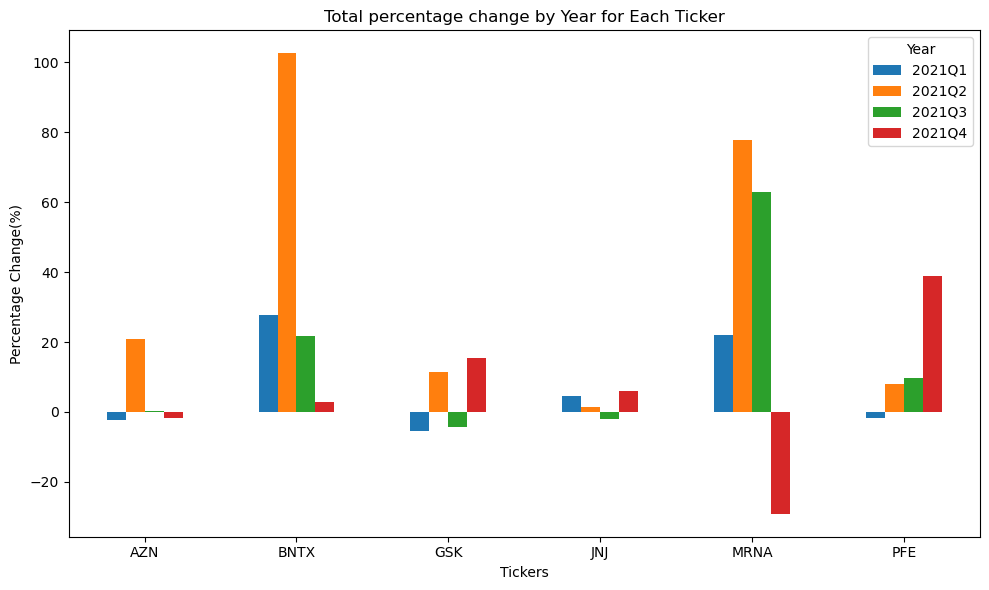

In [430]:
# Plot the Data-
# Step 1: Pivot the DataFrame to have 'Date' as columns and 'Ticker' as rows
pivoted_data = data_q1_to_q4_2021.pivot(index='Ticker', columns='Date', values='percentage_change')


# Step 2: Plot multi-bar chart
pivoted_data.plot(kind='bar', figsize=(10, 6))

# Step 3: Customize the plot
plt.title('Total percentage change by Year for Each Ticker')
plt.ylabel('Percentage Change(%)')
plt.xlabel('Tickers')
plt.xticks(rotation=0)  # Keep ticker labels horizontal
plt.legend(title='Year')
plt.tight_layout()

# Show the plot
plt.show()



In [431]:
# Analyze the Volume of 2021 year quarterly for each stocks-



# Filter for data where the year is 2021
# Step 1: Create the filter for 2021 quarters

filter_2021 = (
    (quarterly_change_df['Date'] == '2021Q1') |
    (quarterly_change_df['Date'] == '2021Q2') |
    (quarterly_change_df['Date'] == '2021Q3') |
    (quarterly_change_df['Date'] == '2021Q4')
)

quarterly_change_df=quarterly_change_df[['Ticker','Date','total_volume']]


# Step 2: Apply the filter
data_q1_to_q4_2021 = quarterly_change_df[filter_2021]

# Display the filtered DataFrame
print(data_q1_to_q4_2021[['Ticker', 'Date', 'total_volume']])





   Ticker    Date  total_volume
4     AZN  2021Q1     687102700
5     AZN  2021Q2     500929200
6     AZN  2021Q3     660915000
7     AZN  2021Q4     291520200
20   BNTX  2021Q1     117849100
21   BNTX  2021Q2     193137200
22   BNTX  2021Q3     274493200
23   BNTX  2021Q4     209982400
36    GSK  2021Q1     362915900
37    GSK  2021Q2     309664400
38    GSK  2021Q3     227896000
39    GSK  2021Q4     269184700
52    JNJ  2021Q1     507242900
53    JNJ  2021Q2     442220400
54    JNJ  2021Q3     380542000
55    JNJ  2021Q4     468562600
68   MRNA  2021Q1     746976900
69   MRNA  2021Q2     607077400
70   MRNA  2021Q3    1183445100
71   MRNA  2021Q4     809748100
84    PFE  2021Q1    2029927100
85    PFE  2021Q2    1659619400
86    PFE  2021Q3    2078643300
87    PFE  2021Q4    2545830600


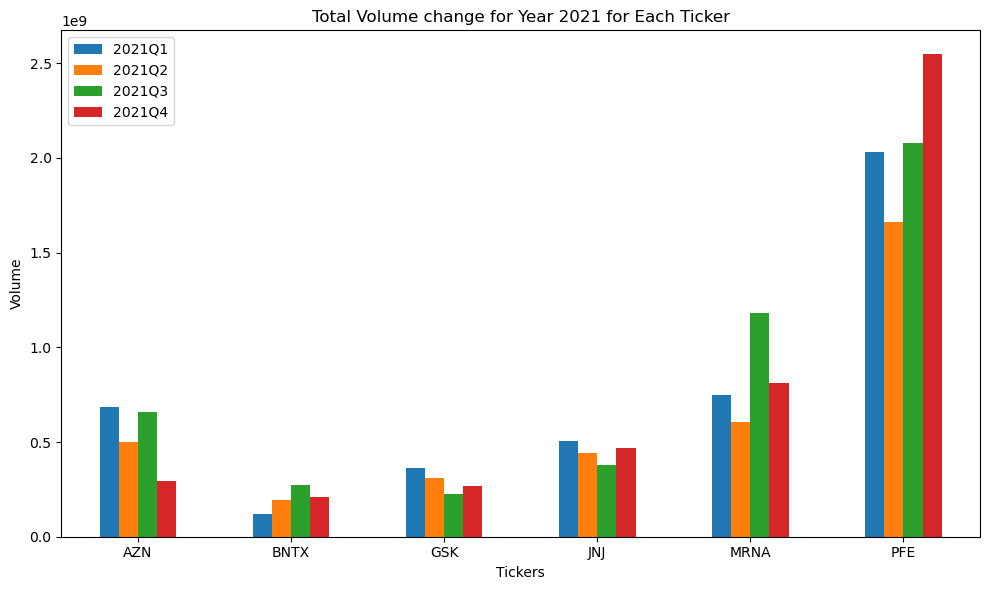

In [432]:
# Plot the Data-
# Step 1: Pivot the DataFrame to have 'Date' as columns and 'Ticker' as rows
pivoted_data = data_q1_to_q4_2021.pivot(index='Ticker', columns='Date', values='total_volume')


# Step 2: Plot multi-bar chart
pivoted_data.plot(kind='bar', figsize=(10, 6))

# Step 3: Customize the plot
plt.title('Total Volume change for Year 2021 for Each Ticker')
plt.ylabel('Volume')
plt.xlabel('Tickers')
plt.xticks(rotation=0)  # Keep ticker labels horizontal
plt.legend(title='')
plt.tight_layout()

# Show the plot
plt.show()

### Yearly Change in stocks 

In [433]:
# Group by yearly

# Group by Ticker and Year, and aggregate first 'Open', last 'Close', and total 'Volume'
yearly_grouped = filtered_df.groupby([filtered_df['Ticker'], filtered_df['Date'].dt.year]).agg(
    first_open=('Open', 'first'),   # First open price in the year
    last_close=('Close', 'last'),   # Last close price in the year
    total_volume=('Volume', 'sum')  # Sum of volume for each year
).reset_index()




In [434]:


# Step 4: Calculate the yearly change (absolute difference or percentage)
yearly_grouped['change'] = yearly_grouped['last_close'] - yearly_grouped['first_open']



In [435]:
# Calculate the percentage change
yearly_grouped['percentage_change'] = (yearly_grouped['last_close'] - yearly_grouped['first_open']) / yearly_grouped['first_open'] * 100

#  Print the result, including 'Ticker' and 'Year'
print(yearly_grouped[['Ticker', 'Date', 'first_open', 'last_close', 'change', 'percentage_change']])

   Ticker  Date  first_open  last_close      change  percentage_change
0     AZN  2020   50.299999   49.990002   -0.309998          -0.616297
1     AZN  2021   50.919998   58.250000    7.330002          14.395134
2     AZN  2022   58.270000   67.800003    9.530003          16.354904
3     AZN  2023   68.650002   67.349998   -1.300003          -1.893668
4    BNTX  2020   35.750000   81.519997   45.769997         128.027963
5    BNTX  2021   85.450996  257.799988  172.348991         201.693367
6    BNTX  2022  253.869995  150.220001 -103.649994         -40.827981
7    BNTX  2023  152.940002  105.540001  -47.400002         -30.992547
8     GSK  2020   46.810001   36.799999  -10.010002         -21.384324
9     GSK  2021   37.720001   44.099998    6.379997          16.914096
10    GSK  2022   44.110001   35.139999   -8.970001         -20.335527
11    GSK  2023   34.939999   37.060001    2.120003           6.067552
12    JNJ  2020  145.869995  157.380005   11.510010           7.890594
13    

In [436]:
# Set the ticker as index for referencing
yearly_change_df = yearly_grouped.set_index("Ticker")
yearly_change_df

,Date,first_open,last_close,total_volume,change,percentage_change
Ticker,,,,,,
AZN,2020,50.299999,49.990002,1519552100,-0.309998,-0.616297
AZN,2021,50.919998,58.250000,2140467100,7.330002,14.395134
AZN,2022,58.270000,67.800003,1649977200,9.530003,16.354904
AZN,2023,68.650002,67.349998,1260493800,-1.300003,-1.893668
BNTX,2020,35.750000,81.519997,609044300,45.769997,128.027963
BNTX,2021,85.450996,257.799988,795461900,172.348991,201.693367
BNTX,2022,253.869995,150.220001,334527400,-103.649994,-40.827981
BNTX,2023,152.940002,105.540001,173063800,-47.400002,-30.992547
GSK,2020,46.810001,36.799999,1024869000,-10.010002,-21.384324


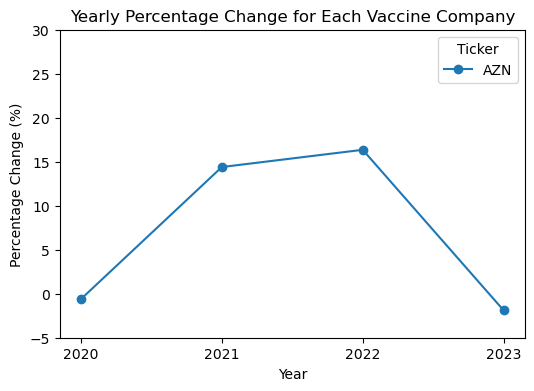

In [437]:
 #Create a line chart for vaccine=Astrazeneca

plt.figure(figsize=(6, 4))

# Select the data for the current ticker
ticker_data =  yearly_change_df.loc['AZN']

plt.plot(ticker_data['Date'].astype(str), ticker_data['percentage_change'], marker='o', label='AZN')
    
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.title('Yearly Percentage Change for Each Vaccine Company')
plt.legend(title='Ticker', loc='upper right')  # Add legend for tickers

plt.ylim(-5, 30)





plt.show()

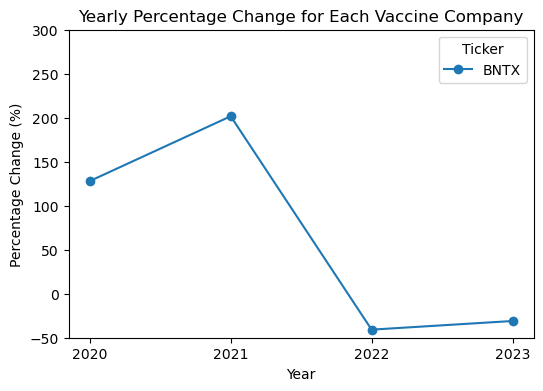

In [438]:
#Create a line chart for vaccine=BNTX

plt.figure(figsize=(6, 4))

# Select the data for the current ticker
ticker_data =  yearly_change_df.loc['BNTX']

plt.plot(ticker_data['Date'].astype(str), ticker_data['percentage_change'], marker='o', label='BNTX')
    
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.title('Yearly Percentage Change for Each Vaccine Company')
plt.legend(title='Ticker', loc='upper right')  # Add legend for tickers

plt.ylim(-50, 300)





plt.show()

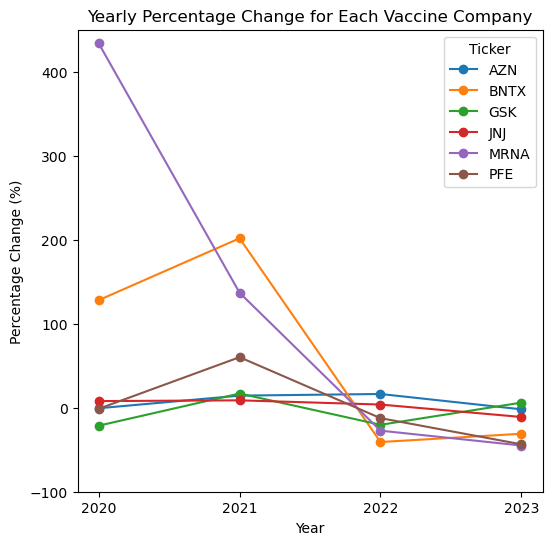

In [439]:
 #Create a figure and axes
plt.figure(figsize=(6, 6))

tickers = yearly_change_df.index.unique()

# Loop through each ticker and plot its data
for ticker in tickers:

    # Select the data for the current ticker
    ticker_data = yearly_change_df.loc[ticker]
    
    # Plot the percentage change over the years
    plt.plot(ticker_data['Date'].astype(str), ticker_data['percentage_change'], marker='o', label=ticker)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.title('Yearly Percentage Change for Each Vaccine Company')
plt.legend(title='Ticker', loc='upper right')  # Add legend for tickers

plt.ylim(-100, 450)





plt.show()

### Analyzing the Total Volume of stocks 

In [440]:
# Total stock Volume for each stock

combined_df

volume_df=combined_df.groupby('Ticker')['Volume'].sum().reset_index()

volume_df

,Ticker,Volume
0,AZN,6570490200
1,BNTX,1912097400
2,GSK,4504139000
3,JNJ,8456534600
4,MRNA,10536994000
5,PFE,30027788466


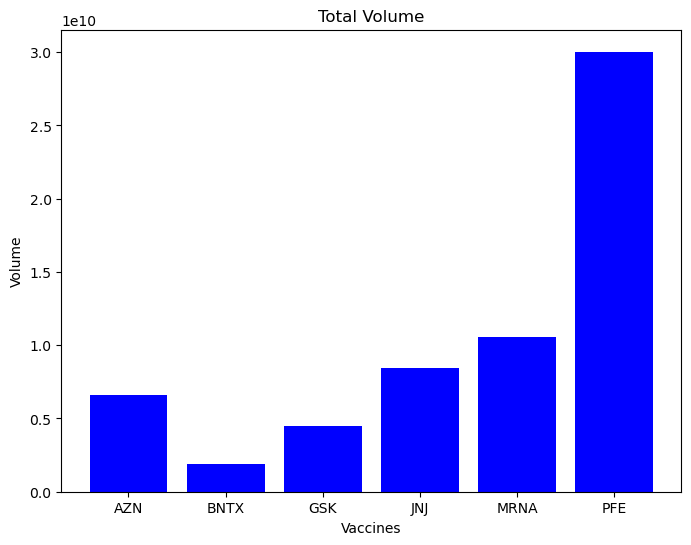

In [441]:
# bar plot for volume of stock per vaccine 

plt.figure(figsize=(8, 6))
plt.bar(volume_df['Ticker'], volume_df['Volume'], color='blue')
plt.title('Total Volume')
plt.xlabel('Vaccines')
plt.ylabel('Volume')
plt.show()


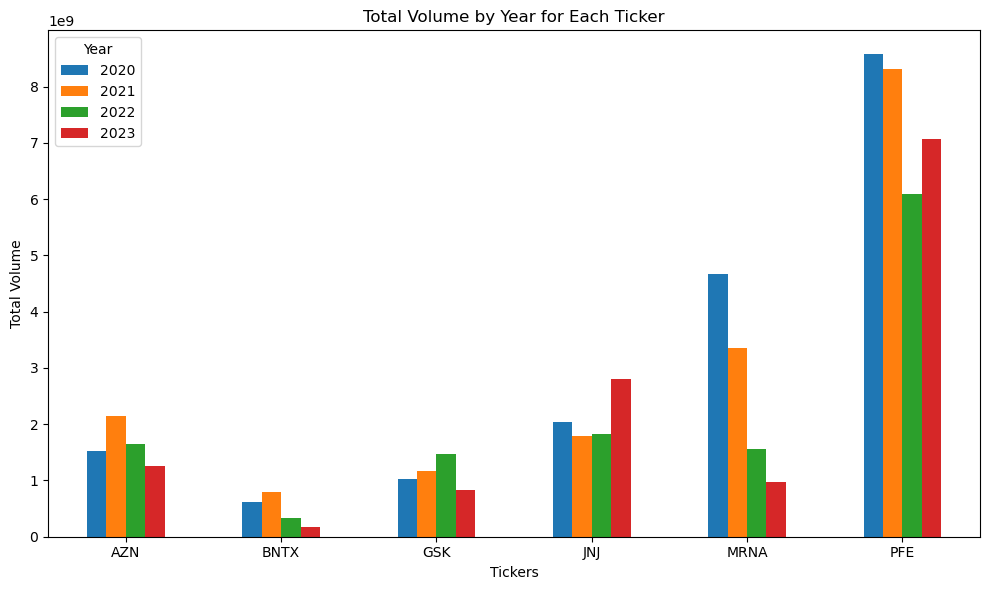

In [442]:
# Create Bar charts -for each vaccine comparing stocks volume per year 

yearly_volume_reset = yearly_change_df.reset_index()




# Step 1: Pivot the DataFrame to have 'Date' as columns and 'Ticker' as rows
pivoted_volume = yearly_volume_reset.pivot(index='Ticker', columns='Date', values='total_volume')

# Step 2: Plot multi-bar chart
pivoted_volume.plot(kind='bar', figsize=(10, 6))

# Step 3: Customize the plot
plt.title('Total Volume by Year for Each Ticker')
plt.ylabel('Total Volume')
plt.xlabel('Tickers')
plt.xticks(rotation=0)  # Keep ticker labels horizontal
plt.legend(title='Year')
plt.tight_layout()

# Show the plot
plt.show()
